### **Telecom Churn Prediction**

[Sumber data Telecom Churn Prediction](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Telecommunication company is a company that provides infrastructure for people to communicate through electronic transmission. People could subscribe to different plan offered by each telecommunication provider such as internet connection, messaging, telephone, etc. With the development of technology in each sector, connectivity is more needed than ever and telecomunication company played a big role in this information era.  

Target :

0 : Customer doesn't churn

1 : Customer churn

**Problem Statement**

As telecomunication developed and gives profit to shareholder, new entrants and competitors has emerge within the incumbent. In order for the company to deliver a great service with competitive price, it needs to be cost effective in every way. One of the way to be cost effective is to retain customers and prevent customer churning. As what [Harvard Business Review](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers#:~:text=Depending%20on%20which%20study%20you,the%20one%20you%20have%20happy) shows that acquiring new customers are more costly than retaining existing ones.  

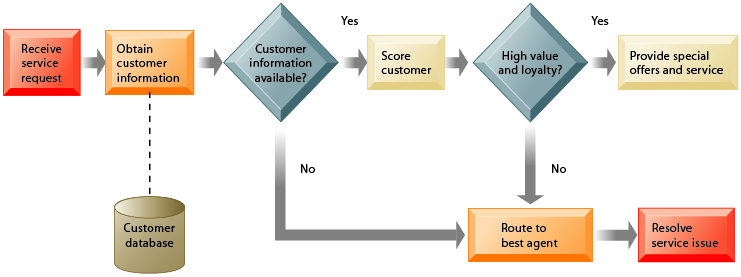

Image Source: https://paginas.fe.up.pt/~als/mis10e/ch9/chpt9-3bullettext.htm

Originally, telecommunication company pays attention more on consumer loyalty and when customers reach the end of their contract terms. Special promotion will be offered when a customer has high loyalty score and the loyalty score is set based on transaction frequency. However, it does not take into account customer who has lower transaction frequency but with high transaction value.There are also other case where a customer are spending more than a hundred dollars a month but is only transacting once a month; in consequence the customer is classified with a low loyalty score. Telco company should take a more active role in analysing customer's history uasage pattern and formulate a strategy to retain customer.

**Before**
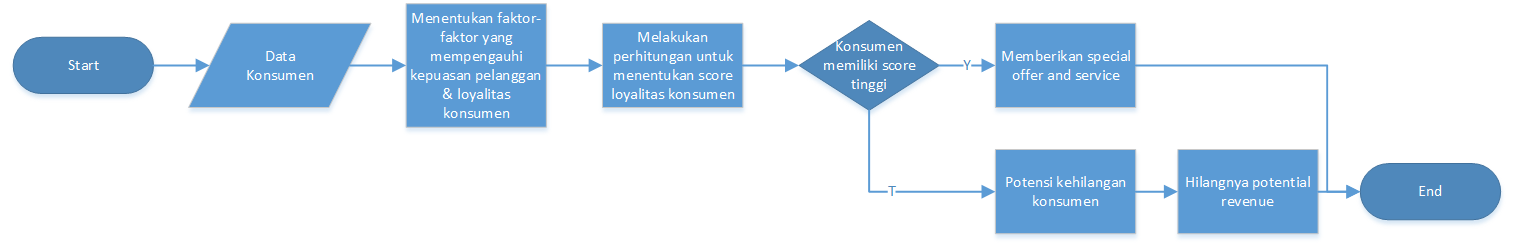

 

**Goals**

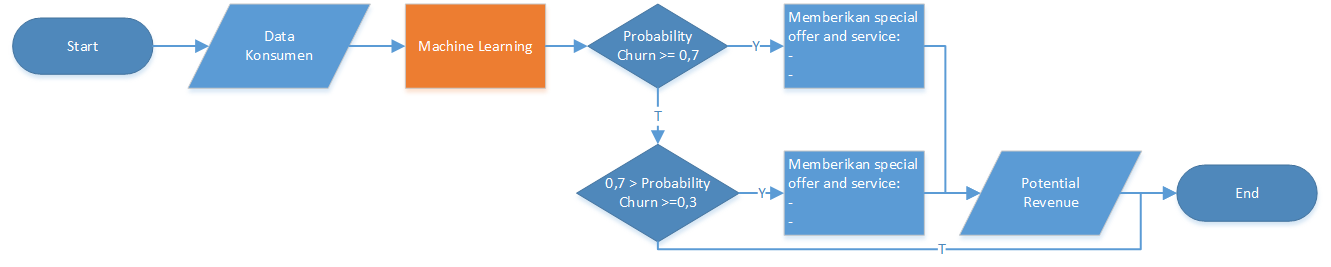

A Telecomunication company has possessed data which contains it's customer's details and their usage history. With the data available, the company wanted to obtain value from it by processing it to get insights and predictive models for its uses. The predictive model will be built to predict customer probability of churning. And this ratio of probability will be used in the new flow to improve services and products.

There are two types of marketing strategy: the untargeted and the targeted. First, focusing on brand loyalty and mass advertising. Second, relies on targeted action and giving special program and incentives (recduce price, custom plan, etc).
With machine learning, we could do targeted approach that are based on churn probability which can be useful in retaining price-sensitive customers or those who need special services from the service provider and in the end improving company's margin. 

**BUSINESS QUESTION**

1. How does type of contract affect churn percentage?
2. How does monthly charges paid by subscriber played a role in customer churn?
3. Which type of internet service affects customer churn most and how to improve it?
4. Which type of payment method affects churn rate the most?
5. Does Tenure affects churn rate and how?
6. Which type of additional features affects churn and customer amount?

**Analytic Approach**

This project will aims at creating a model that is predicting (Predictive) churn probability using the data.The data will be analyze to obtain pattern that differentiate between customers who will remain and customer who will churn. With the classification model obatained prescribtion will be formulated to prevent customer from churning.

**Metric Evaluation**

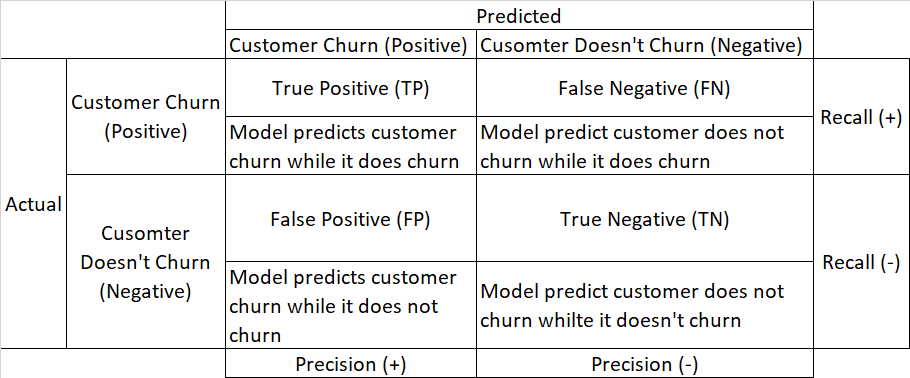

Type 1 error : False Positive (Model predicts customer churn while it does not churn)

Consequence: retention cost (promotion) spent in vain
            
Type 2 error : False Negative (Model predict customer does not churn while it does churn)

Consequence: losing potention revenue

RECALL(+) CHURN

Based on the consequence, our goal is to construct a model that will minimize potential loss of revenue by having the least value of recall.


### **Data Understanding**

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| customerID | Object | Customer ID |
| gender | Object | Whether the customer is a male or a female |
| SeniorCitizen | Integer | Whether the customer is a senuior citizen or not (1,0) |
| Partner | Object | Whether the customer has a partner or not (Yes, No) |
| Dependents | Object | Whether the csutomer has dependendents or not (Yes, No) |
| tenure | Integer | Number of months customer has stayed with the company |
| PhoneService | Object | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines | Object | Whether the cutomer has multiple lines or not (Yes, No) |
| InternetService | Object | Customer's internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | Object | Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup | Object | Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection | Object | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport | Object | Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV | Object | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies | Object | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract | Object | The contract term of the customer (Month-to-month, One year, Two year) |
| PaperlessBilling | Object | Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod | Object | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges | Float | The amount charged to the customer monthly |
| TotalCharges | Object | The total amount charged to the customer |
| Churn | Object | Whether the customer churned or not (Yes or No) |
<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer # digunakan untuk cek missing Value
from sklearn.preprocessing import RobustScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score # Evaluation Matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce

import dython
from dython.nominal import associations, cramers_v, theils_u, correlation_ratio

In [2]:
df = pd.read_csv('telco_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


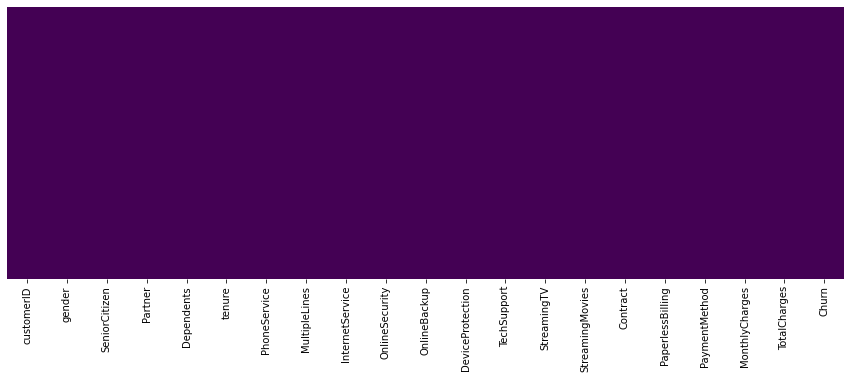

In [20]:
# Checking Missing Value
plt.figure(figsize = (15, 5))
sns.heatmap(df.isna(), cmap = 'viridis',yticklabels = False, cbar= False)
plt.show()

In [5]:
TelcoChurnDesc = []
for i in df.columns:
    TelcoChurnDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum() / len(df)) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(TelcoChurnDesc, columns=[
    "Data Features",
    "Data Types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,customerID,object,0,0.0,7043,"[4565-NLZBV, 2716-GFZOR]"
1,gender,object,0,0.0,2,"[Male, Female]"
2,SeniorCitizen,int64,0,0.0,2,"[0, 1]"
3,Partner,object,0,0.0,2,"[No, Yes]"
4,Dependents,object,0,0.0,2,"[Yes, No]"
5,tenure,int64,0,0.0,73,"[16, 26]"
6,PhoneService,object,0,0.0,2,"[Yes, No]"
7,MultipleLines,object,0,0.0,3,"[No, Yes]"
8,InternetService,object,0,0.0,3,"[No, Fiber optic]"
9,OnlineSecurity,object,0,0.0,3,"[No internet service, Yes]"


In [7]:
df[df['TotalCharges']==' '] #MISSING VALUE: KARENA JUMLAHNYA TERLALU SEDIKIT PERBANDINGANNYA

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [2]:
(11/7043)*100

0.1561834445548772

In [3]:
df=df[df['TotalCharges']!=' '] #DROP MISSING VALUE: KARENA JUMLAHNYA TERLALU SEDIKIT PERBANDINGANNYA

In [10]:
df[(df['MonthlyCharges']>=100) & (df['tenure']<=3)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
171,1875-QIVME,Female,0,Yes,No,2,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.40,242.8,Yes
678,5760-IFJOZ,Male,0,No,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,107.95,313.6,No
1719,2081-VEYEH,Male,0,No,No,3,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,107.95,318.6,No
2208,7216-EWTRS,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.80,100.8,Yes
2246,7181-BQYBV,Female,0,Yes,Yes,1,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,102.45,102.45,Yes
2797,6023-YEBUP,Male,0,No,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.95,329.95,Yes
3085,5052-PNLOS,Male,0,No,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),105.35,323.25,Yes
3871,5299-SJCZT,Male,0,No,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.55,298.35,Yes
4459,3178-FESZO,Female,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.25,100.25,Yes
4952,7379-FNIUJ,Male,0,No,No,2,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,100.20,198.5,No


In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'ignore')

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.duplicated().sum()

0

In [12]:
def cek_outliers(tabel,col):
    Q1 = tabel[col].describe()['25%']
    Q3 = tabel[col].describe()['75%']
    IQR = Q3-Q1
    UF = Q3 + (1.5*IQR)
    LF = Q1 - (1.5*IQR)
    tabel_outliers = df[(df[col] < LF) | (df[col] > UF)]
    if len(tabel_outliers) == 0:
           return "No Outliers"
    else:
           return tabel_outliers

In [17]:
cek_outliers(df,'MonthlyCharges')

'No Outliers'

In [16]:
cek_outliers(df,'tenure')

'No Outliers'

In [18]:
cek_outliers(df,'TotalCharges')

'No Outliers'

In [19]:
df.to_csv('telcoo.csv', index=False)

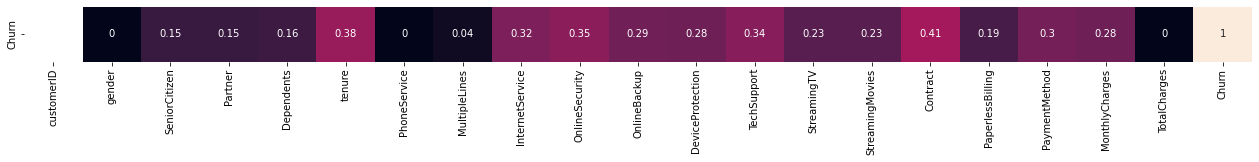

In [20]:
assoc_cr = []
for i in df.columns:
    assoc = round(cramers_v(df['Churn'], df[i]), 2)
    assoc_cr.append(assoc)
    
df_cr = pd.DataFrame(data = [assoc_cr],columns = df.columns, index=['Churn'])

plt.figure(figsize=(22,1))
sns.heatmap(df_cr, annot= True, cbar=False)
plt.show()

From the cramers assosciation measure that has been performed, there are 3 features that has no assosciation with the target: Gender, Phone Service, and Total Charges.

### **Explanatory Data Analysis**

#### Background
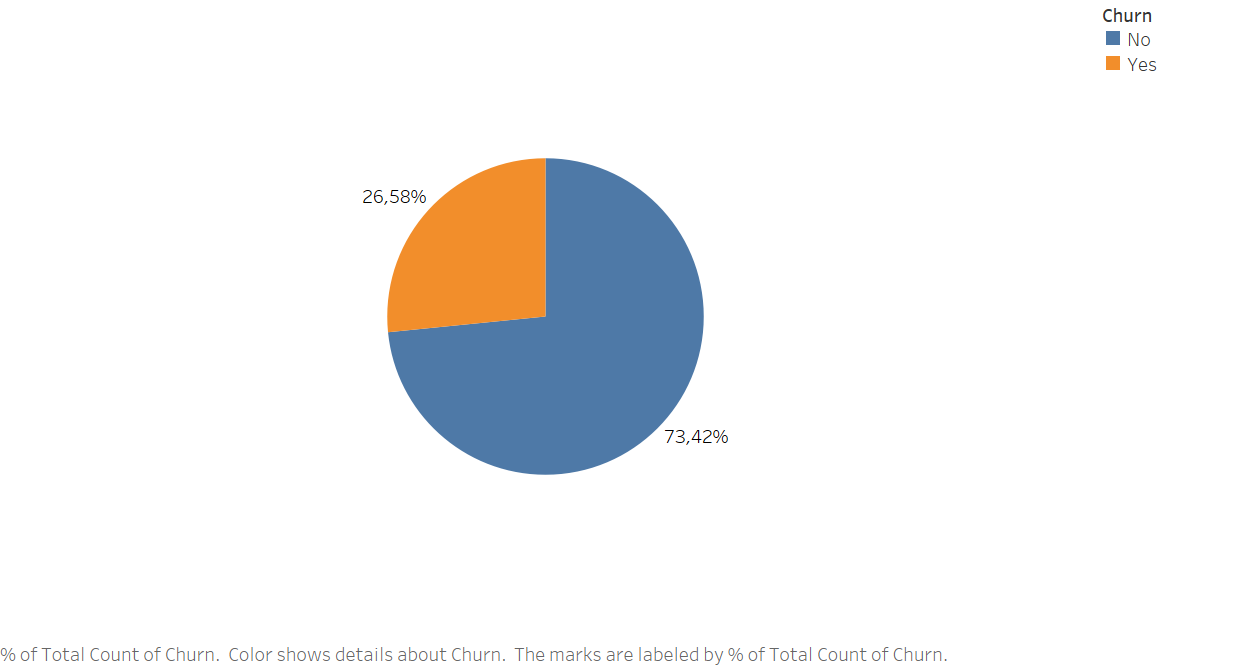
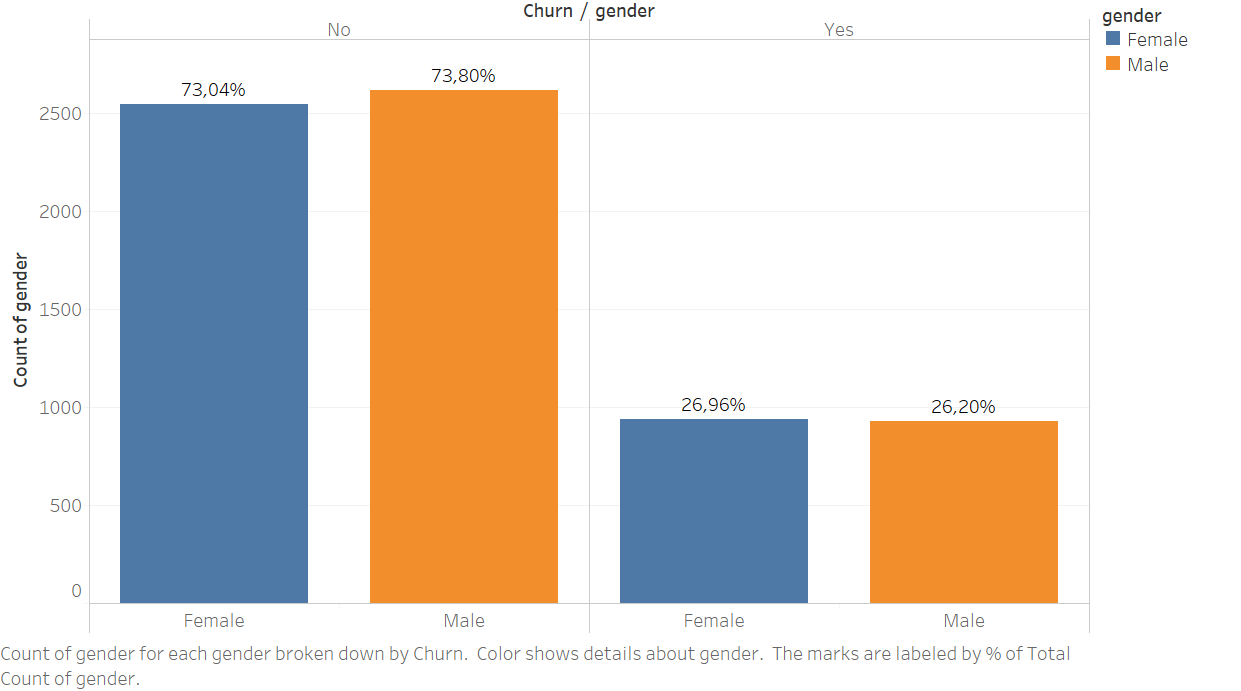

Based on the figure above, from 7000 customers in the dataset 26.58% of them churn.
Male and Female customers does not have significant difference as a factor to churn rate.

### 1. Churn Percentage based on the Contract

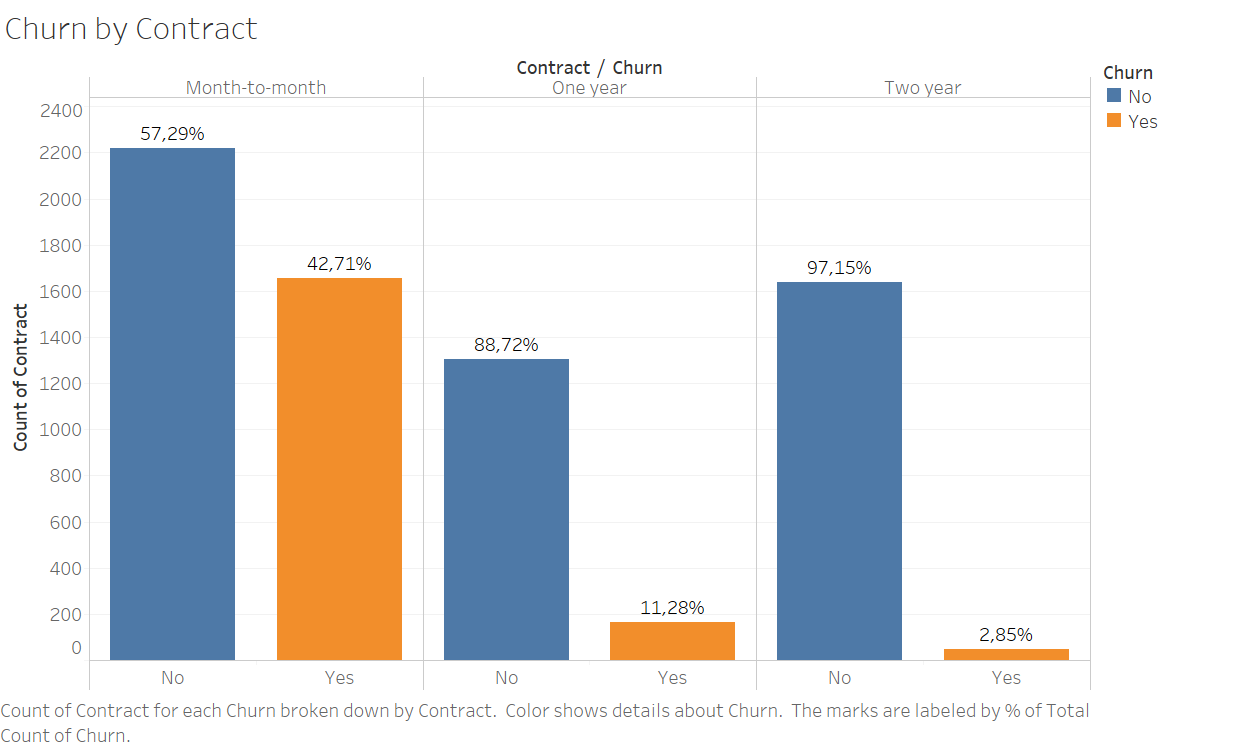

How does type of contract affect churn percentage?

Based on graph above, it is known that a two year contract has the lowest churn rate, followed by one year contract and then month to month. This shows that the longer the time of contract, the more commitment the subscriber have. A month to month contract has the highest churn rate of 42%. With this in mind, encouraging customer to subscribe a longer contract would decrease churn rate. It can be done by giving more privilege and incentives for longer contract. 6 months contract would be one program alternative that could be done.

#### 2. Churn Percentage based on Consumer Monthly Charges

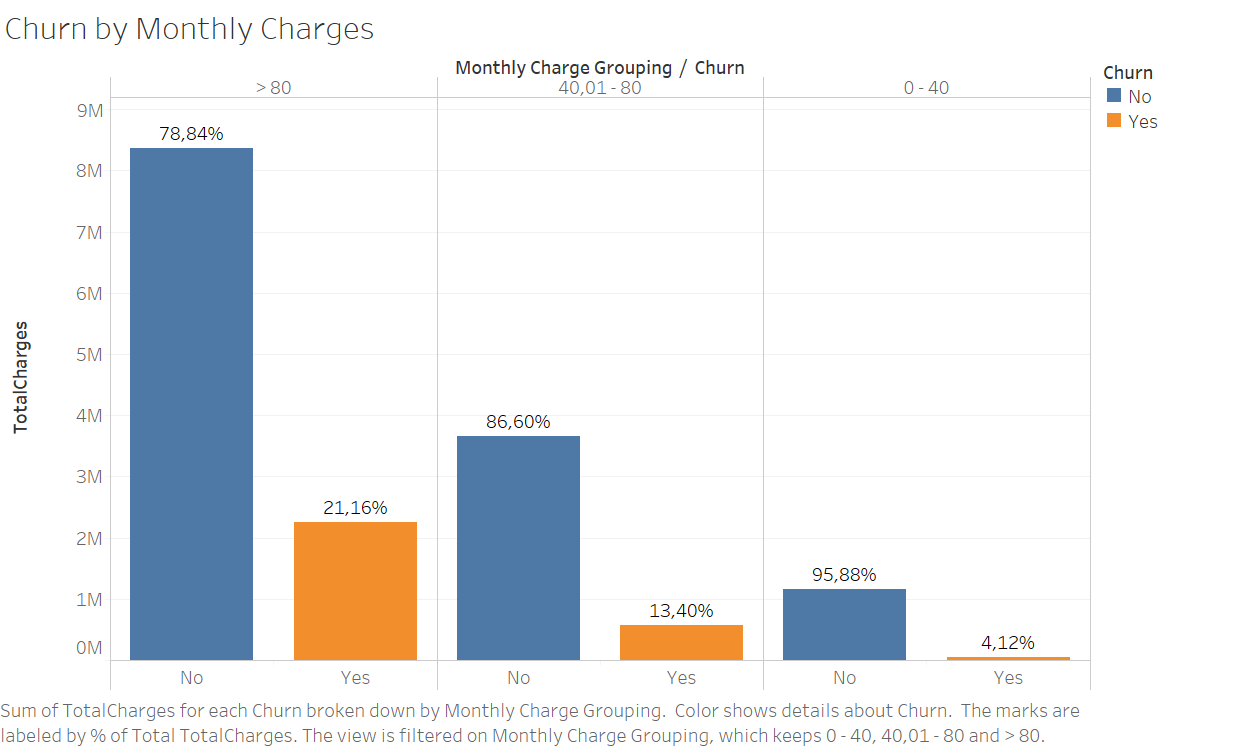

How does monthly charges paid by subscriber played a role in customer churn?

The graph above shows that the lower the charge that customer pay each month the less the churn rate is. Monthly charge of 80 dollars or more has the highest churn rate. Focusing on this group range of monthly charge is important. There are several ways that can be done to decrease the rate of churning while still maintaining their rate of spending. 
- give low cost incentives such as 5 mbps speed boost, free call among user.
- promotion program such as discount voucher for online application (spotify, apple store, netflix, games etc)

#### 3. Churn Percentage based on Internet Service

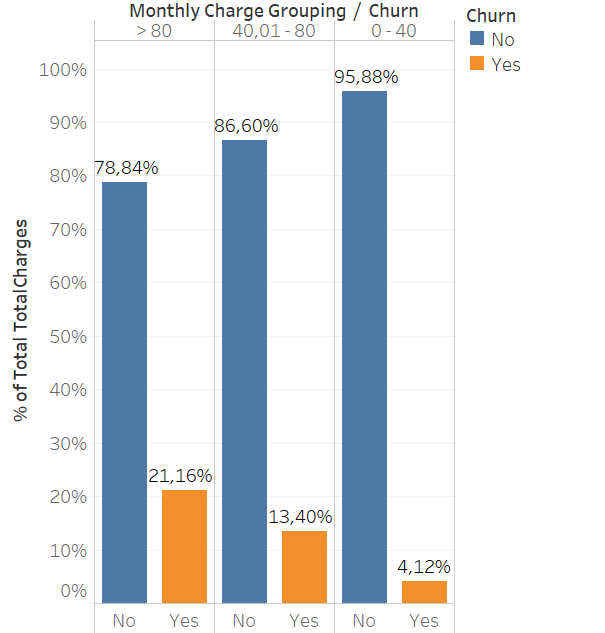

Which type of internet service affects customer churn most and how to improve it?

DSL has the highest subscriber, followed by fiber optic. However the churn percentage of each services shows a different insights. Although Fiber Optic is the best in terms of speed, it has the highest churn rate. It shows that there is something wrong with this services. Either the fiber optic service offered isn't attractive enough compared to competitor's one or the service offered is not good enough. Further investigation needs to be done in this area.

Possible fiber optic problem
- Quality assurance constraint (fragile fiber optic cable)
- Constant signal loss
- High Traffic results in slow speed
- high price 


#### 4. Churn Percentage based on Payment method

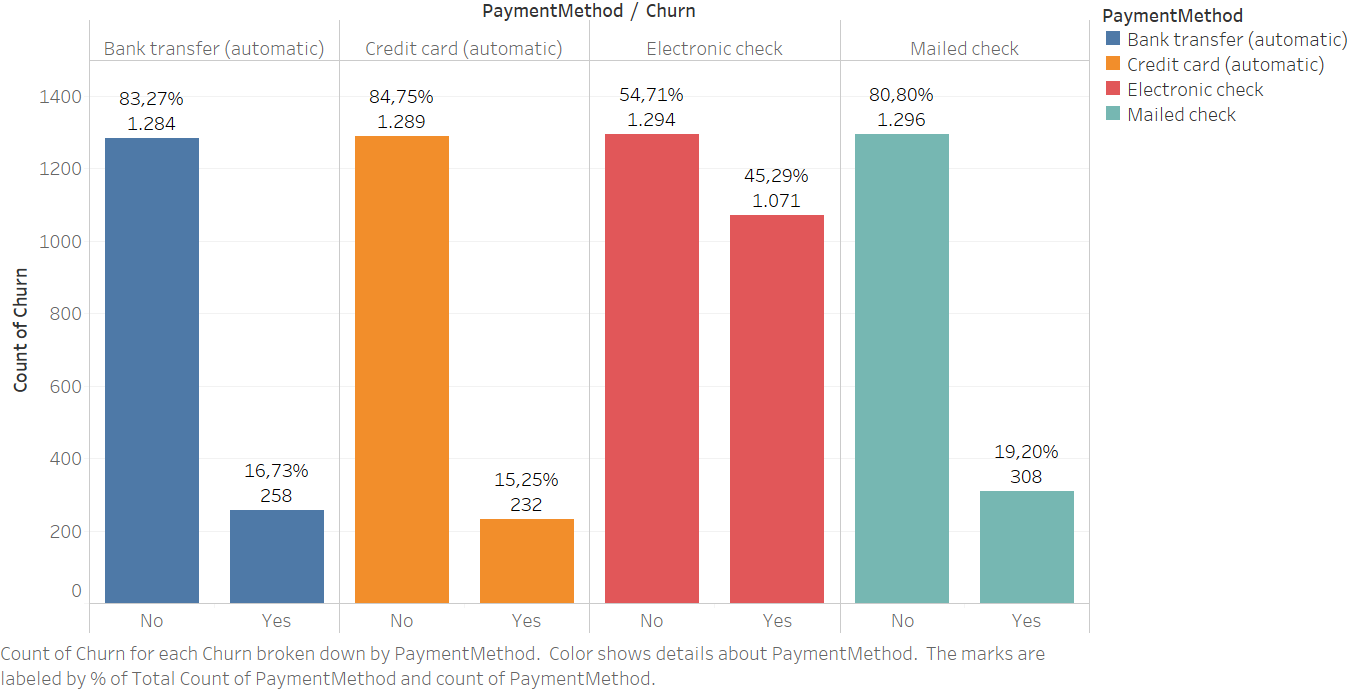

Which type of payment method affects churn rate the most?

There are 4 types of payment method. Most of them has the similar amount. Electronic checks method has the highest number overall with also the higest number of churn, followed by mailed check. This shows that checked method still has its own market but a lot of people are switching from it. Encouraging customers towards a simpler payment method will results in lower churn rate.

#### 5. Churn Percentage based on Tenure

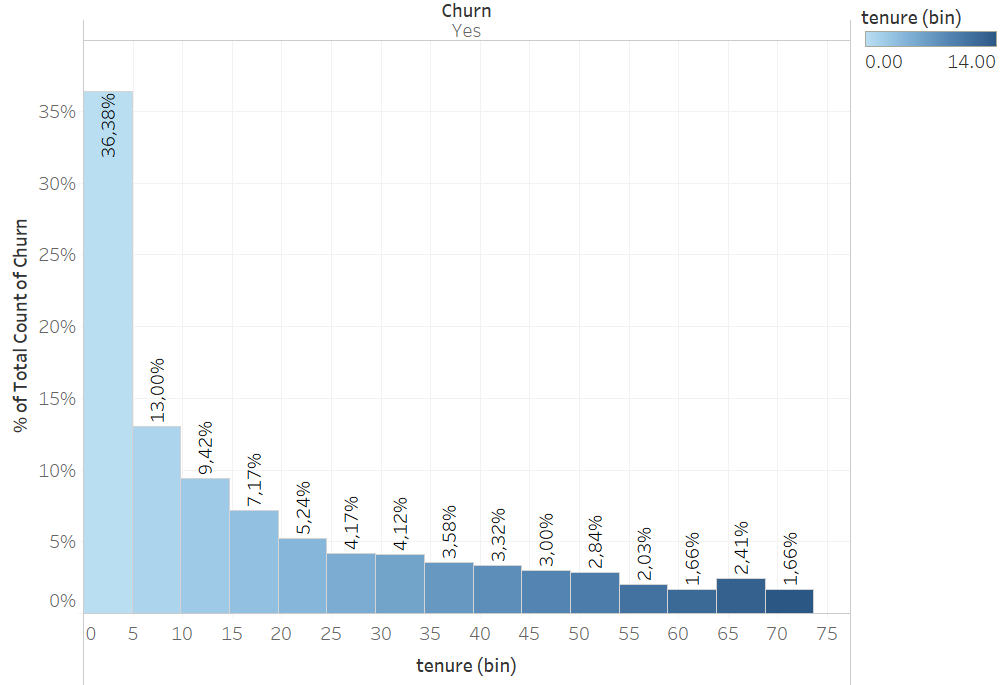

Does Tenure affects churn rate and how?

The figure above shows that consumer churn happens on the first half year. After it goes beyond half year less customer are churning. There are several reasons that explains this phenomenon. First, the first 6 months of a customer is the time where customer are trying out the service and after that they are deciding whether they are continuing with the service or they are swithing to try on other carrier. Second, the trends that flattens down on the churn(Yes) section shows that the longer a customer has subscribed, the less the probability they churn. The effort of switching at this time might be a lot more than the benefit they will get fromm swithing. And they might just already being comfortable with the current service. 

Therefore, being more active and engaging to customer on the first year of customer lifetime is crucial. Developing programs and promotions might be an alternative.

#### 6. Additional Services in relation with customer and churn amount.

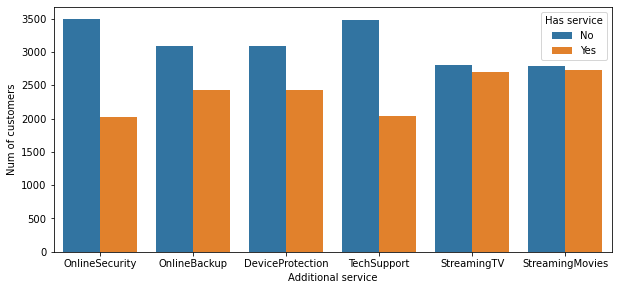

In [14]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

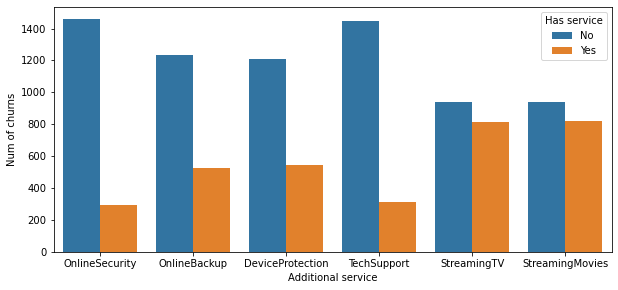

In [19]:
plt.figure(figsize=(10, 4.5))
df1 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

Which type of additional features affects churn and customer amount?

The first plot shows the total number of customers for each additional service, while the second shows the number of clients that churn. We can see that:

Customers with the first 4 additionals (security to tech support) are more unlikely to churn
While streaming service user has more number of customer churns.

### Conclusion & Recommendation

Based on the classification report , we could conclude that our model could help telco company in filtering customers tendency of churning. 

we could predict correctly .... % of churning.

with this insights obtained from the model, company needs to take the right approach towards customer that has high probabilty of churning. The right approach determines whether the customer will or will not churn. 

Explanatory data analysis that are done reveal that there are several factors that affects customer churn. And from the condition that we experience, these are the things that could be done to improve the company churning rate. 
- Contract Type - as month to month contract has the highest churn rate compared to longer contract. We encourage product team to formulate new product with 6 month contract and Marketing team to make a campaign that encourage subscriber to commit for a longer time. 
- Monthly Charges Paid - A monthly charge 80 dollars or more has the highest churn rate while giving the highest revenue. We need to maintain the spending while decreasing the rate of churning by giving more perks and incentives for high spender such as internet speed boost, free call, discount voucher for application.
- Type of Internet Services - Fiber optic proves to be the highest churn contributor compared to other services. We need to improve fiber optic serivces by improving its reliability in speed, and stable connection.
- Payment Method - Among the 4 payment method, the two checks method has higher rate of churning. We could improve this by encouraging user to migrate to automated payment system like credit card or  bank transfer.
- Tenure - The longer the tenure the lower the probability of churning. Paying more attention to subscriber in the first 6 months of it's customer life needs to be done.

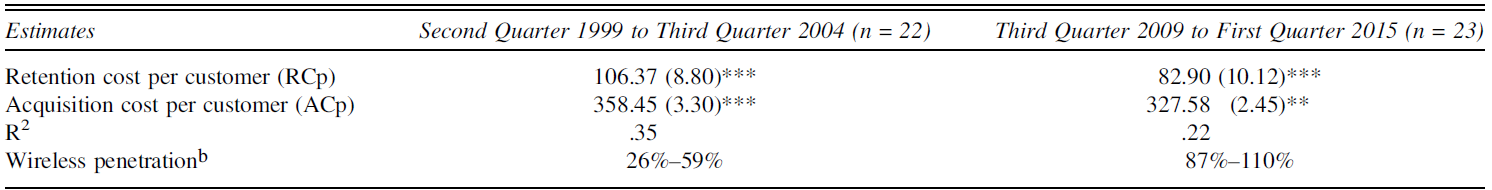.

From the research journal done by California State University we could assume that the retention cost to be 80 dollar per customer while acquiring a new customer cost around $320 per customer.



Improvement that could be done:
- Improve network coverage
- Personalised rate plan based on each customer's historical data
- Domestic calls between intra-network (on-net) and inter-network (off-net)
types. 
- simplifying rate plan structures
- value-added service such as global roaming and data service
- An ‘unlimited’ usage plan for customers with high wireless usage needs
- loyalty programmes in which customers can accumulate dollar points for gifts redemption.
- roll-over minutes’ so that customers can retain the value of their unused minutes
- allowing customers to share their minutes with friends and family members
- historical usage information presented graphically in their
monthly invoices for customer to understand better
- recommending cost effective rate plans to customer on a periodical basis

Project limitation
This research has not examined other external factor that influence.....
Further research could be done to cover other areas and gain more insights in this field.